In [ ]:
import sys
!{sys.executable} -m pip install pandas numpy flask pycaret

'C:\Users\ketak\OneDrive\Desktop\5th' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
!pip install pandas numpy pycaret flask


[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


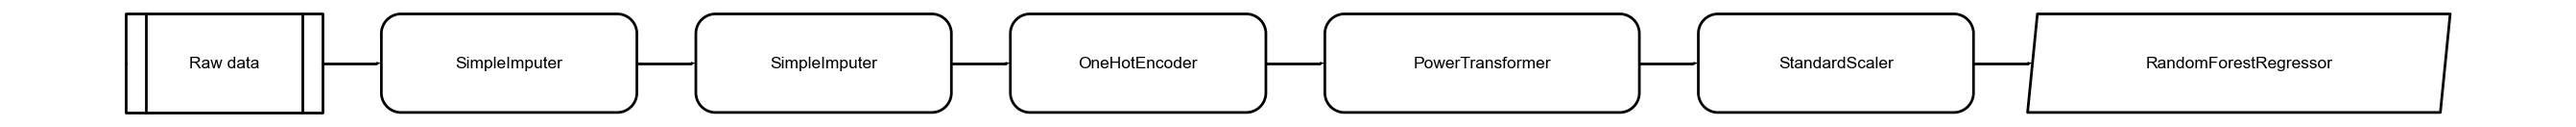

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,0.1294,0.1566,0.3957,0.9934,0.0125,0.0042


   hour_of_day    coffee_name Time_of_Day Weekday Month_name      money  \
0           10          Latte     Morning     Fri        Mar  38.700001   
1           12  Hot Chocolate   Afternoon     Fri        Mar  38.700001   
2           12  Hot Chocolate   Afternoon     Fri        Mar  38.700001   
3           13      Americano   Afternoon     Fri        Mar  28.900000   
4           13          Latte   Afternoon     Fri        Mar  38.700001   

   prediction_label  
0         37.685210  
1         38.459901  
2         38.459901  
3         27.467106  
4         36.835899  
Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\ketak\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['hour_of_day'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['coffee_name', 'Time_of_Day',
                                              'Weekday', 'Month_name'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('onehot_encod...
                                     transformer=OneHotEncoder(cols=['coffee_name',
                                                                     'Time_of_Day',
                                                                     'Weekday',
                                                                     'Month_name'],
                                                               handle_missing='return_nan',
           

In [3]:
# 1. Install PyCaret if not installed
# pip install pycaret

import pandas as pd
from pycaret.regression import *

# 2. Load your Kaggle data
# Assuming you've downloaded the CSV from Kaggle and saved it locally
df = pd.read_csv('coffee_sales.csv')  # change path accordingly

# 3. Data preprocessing: Example checks
print(df.head())
print(df.info())
print(df.isna().sum())

# (Optional) Do any manual preprocessing: fill missing values, convert categorical dtypes etc.
# e.g. df['region'] = df['region'].astype('category')

# 4. PyCaret setup
reg = setup(
    data = df,
    target = 'money',   # change to your target column
    session_id = 123,
    fold_strategy = 'kfold',
    fold = 5,
    numeric_features = ['hour_of_day'],   # list your numeric features
    categorical_features = ['coffee_name', 'Time_of_Day','Weekday','Month_name'],       # list your categorical features
    normalize = True,           # optional: normalize numeric features
    transformation = True,      # optional: transform features to better distribution
    transform_target = False,   # optional: transform target if needed
)

# 5. Compare models
best_model = compare_models(sort = 'MAE')  # you can change metric

# 6. Create/tune model: example with Random Forest
rf = create_model('rf')
tuned_rf = tune_model(rf, optimize = 'MAE')

# 7. Evaluate
evaluate_model(tuned_rf)

# 8. Finalize (train on full data)
final_rf = finalize_model(tuned_rf)

# 9. Predict on new/unseen data
# Let's say you have a test dataset or want to predict on the same dataset
predictions = predict_model(final_rf, data=df)
print(predictions.head())

# 10. Save model
save_model(final_rf, 'coffee_sales_rf_model')

# To load later:
# loaded_model = load_model('coffee_sales_rf_model')



In [8]:
for col in df.columns:
    print(col, df[col].apply(type).unique())

hour_of_day [<class 'int'>]
money [<class 'float'>]
coffee_name [<class 'str'>]
Time_of_Day [<class 'str'>]
Weekday [<class 'str'>]
Month_name [<class 'str'>]
